### Importing Packages

In [317]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

In [324]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",150)

In [207]:
df=pd.read_csv("hepatitis_csv.csv")

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [209]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [211]:
df.isna().sum()/df.shape[0]*100

age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

There are some missing value in the data.

###  R Script

In [ ]:
#data<- read.csv(file.choose(""))
#data[data==""]<- NA
#library(mice)

#impute <- mice(data,m=10,method="pmm",maxit = 10)
#data_1 <- complete(impute,3)
#write.csv(data_1,"imputed.csv")

In [255]:
#subprocess.run(["Rscript", "impute.R"])

CompletedProcess(args=['Rscript', 'impute.R'], returncode=0)

Using Mice Package in R, imputed the missing value using pmm method

In [256]:
data=pd.read_csv("imputed.csv",index_col="Unnamed: 0")

In [257]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
1,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,32,False,live
2,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,32,False,live
3,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,31,False,live
4,31,female,True,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,85,200,4.0,50,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,52,242,3.3,50,True,die
152,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,35,True,live
153,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,31,True,live
154,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81,19,4.1,48,True,live


In [447]:
print("Number of Rows : ",data.shape[0])
print("Number of Columns : ",data.shape[1])

Number of Rows :  155
Number of Columns :  20


In [258]:
numerical_data=data.select_dtypes(include=["int64","float64"])

In [296]:
categorical_data=data.select_dtypes(include=["bool","object"])

In [297]:
categorical_data.head()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
1,male,False,False,False,False,False,False,False,False,False,False,False,False,live
2,female,False,False,True,False,False,False,False,False,False,False,False,False,live
3,female,True,False,True,False,False,True,False,False,False,False,False,False,live
4,female,True,True,False,False,False,True,False,False,False,False,False,False,live
5,female,True,False,False,False,False,True,False,False,False,False,False,False,live


In [290]:
numerical_data.head()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
1,30,1.0,85,18,4.0,32
2,50,0.9,135,42,3.5,32
3,78,0.7,96,32,4.0,31
4,31,0.7,46,52,4.0,80
5,34,1.0,85,200,4.0,50


### Descriptive Statistics

In [450]:
numerical_data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,1.416129,97.858065,85.322581,3.703871,49.780645
std,12.565878,1.214762,49.458685,89.221011,0.702859,22.371501
min,7.000000,0.300000,26.000000,14.000000,2.100000,0.000000
25%,32.000000,0.700000,64.000000,31.000000,3.050000,32.000000
50%,39.000000,1.000000,85.000000,58.000000,3.900000,41.000000
75%,50.000000,1.500000,119.500000,100.500000,4.200000,65.000000
max,78.000000,8.000000,295.000000,648.000000,6.400000,100.000000


In [451]:
categorical_data.describe()

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,155,155,155,155,155,155,155,155,155,155,155,155,155,155
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,female,True,False,True,False,False,True,False,False,False,False,False,False,live
freq,139,79,131,100,94,123,130,95,125,99,130,136,85,123


# Exploratory Data Analysis

### Age

In [436]:
print('Age:\nMinimum age of the Patient: ', numerical_data['age'].min())
print('Maximum age of the Patient: ', numerical_data['age'].max())

Age:
Minimum age of the Patient:  7
Maximum age of the Patient:  78


### Patient Alive Status 

<AxesSubplot:title={'center':'Alive Status'}, xlabel='class', ylabel='count'>

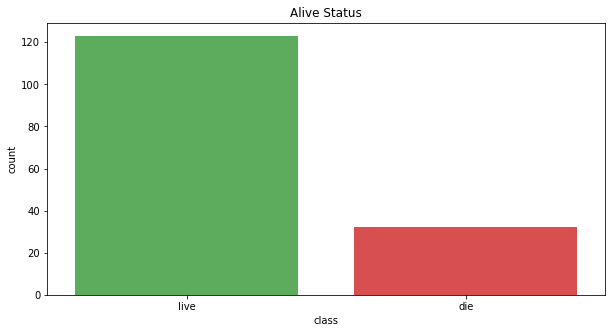

In [448]:
plt.figure(figsize=(10,5))
plt.title("Alive Status")
sns.countplot(categorical_data["class"],palette= ["#50b950","#ee3838"])

In [449]:
data["class"].value_counts(normalize=True)*100

live    79.354839
die     20.645161
Name: class, dtype: float64

(79.3%) of the patient are alive

(20.6%) of the patient are died

### Patients Gender Counts

<AxesSubplot:title={'center':'Sex Counts'}, xlabel='sex', ylabel='count'>

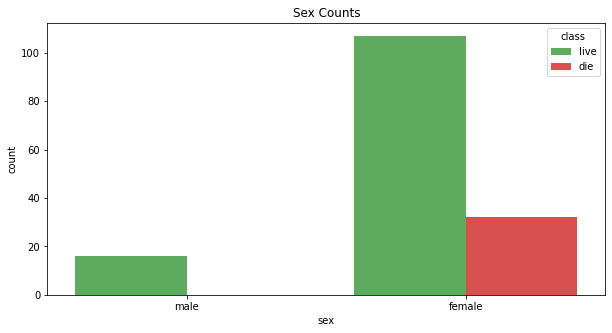

In [425]:
plt.figure(figsize=(10,5))
plt.title("Sex Counts")
sns.countplot(categorical_data["sex"],hue=categorical_data["class"],palette= ["#50b950","#ee3838"])

In [308]:
categorical_data["sex"].value_counts(normalize=True)*100

female    89.677419
male      10.322581
Name: sex, dtype: float64

Most of the patients are female (89.6%) comapered to male (10.3%).

### Patients Alive Status

In [310]:
categorical_data.groupby(categorical_data["sex"])["class"].value_counts(normalize=True)*100

sex     class
female  live      76.978417
        die       23.021583
male    live     100.000000
Name: class, dtype: float64

From (89.6%) of female patients (76.9%) are alive and (23%) are died.

From (10.3%) of male patients all of them alive.

### Patients Consuming Steroids and their Alive Status

<AxesSubplot:title={'center':'Steroid Consumption'}, xlabel='steroid', ylabel='count'>

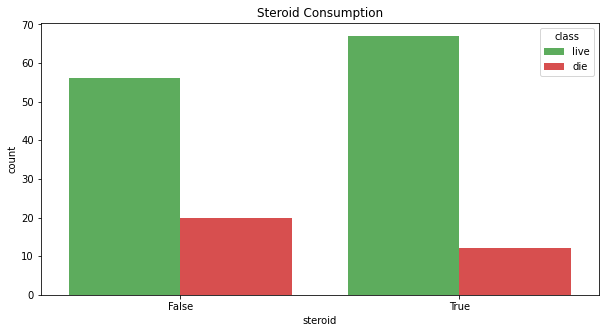

In [382]:
plt.figure(figsize=(10,5))
plt.title("Steroid Consumption")
sns.countplot(categorical_data["steroid"],hue=categorical_data["class"],palette= ["#50b950","#ee3838"])

<AxesSubplot:title={'center':'Steroid Consumption'}, xlabel='steroid', ylabel='count'>

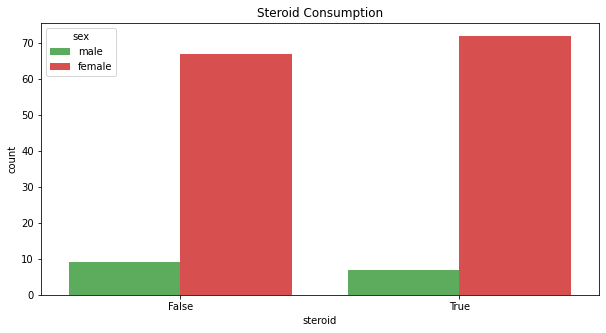

In [426]:
plt.figure(figsize=(10,5))
plt.title("Steroid Consumption")
sns.countplot(categorical_data["steroid"],hue=categorical_data["sex"],palette= ["#50b950","#ee3838"])

In [313]:
categorical_data.groupby(["sex"])["steroid"].value_counts(normalize=True)*100

sex     steroid
female  True       51.798561
        False      48.201439
male    False      56.250000
        True       43.750000
Name: steroid, dtype: float64

In [312]:
categorical_data.groupby(["sex","steroid"])["class"].value_counts(normalize=True)*100

sex     steroid  class
female  False    live      70.149254
                 die       29.850746
        True     live      83.333333
                 die       16.666667
male    False    live     100.000000
        True     live     100.000000
Name: class, dtype: float64

(51.8%) of the females are Consuming Steroids and (48.2%) of the females are not Consuming Steroids.

(43.7%) of the males are Consuming Steroids and (56.2%) of the males are not Consuming Steroids.

From the comparison mostly females are consuming Steroids. Majority of the Steroids Consuming peoples are Live.

(70.1%) of the females who are all not taking Steroids are alive and (29.85%) of them are died.

(83.3%) of the females who are all taking Steroids are alive and only (16.6%) of them are died.

But None of the Males are died.

Steroids had some amount of impact on females to live, whereas there is no evidence in this data, that steroid had impact on males (May be due to male patients are less in number).

### Patients Consuming Antivirals and their Alive Status

<AxesSubplot:title={'center':'Antivirals Consumption'}, xlabel='antivirals', ylabel='count'>

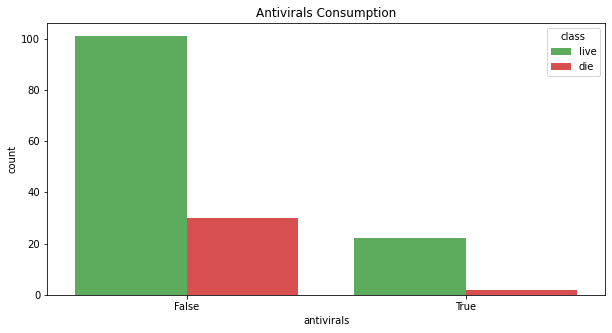

In [384]:
plt.figure(figsize=(10,5))
plt.title("Antivirals Consumption")
sns.countplot(categorical_data["antivirals"],hue=categorical_data["class"],palette= ["#50b950","#ee3838"])

<AxesSubplot:title={'center':'Antivirals Consumption'}, xlabel='antivirals', ylabel='count'>

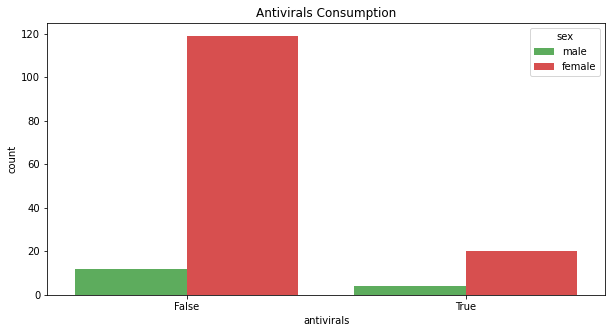

In [427]:
plt.figure(figsize=(10,5))
plt.title("Antivirals Consumption")
sns.countplot(categorical_data["antivirals"],hue=categorical_data["sex"],palette= ["#50b950","#ee3838"])

In [342]:
categorical_data.groupby(["sex"])["antivirals"].value_counts(normalize=True)*100

sex     antivirals
female  False         85.611511
        True          14.388489
male    False         75.000000
        True          25.000000
Name: antivirals, dtype: float64

In [343]:
categorical_data.groupby(["sex","antivirals"])["class"].value_counts(normalize=True)*100

sex     antivirals  class
female  False       live      74.789916
                    die       25.210084
        True        live      90.000000
                    die       10.000000
male    False       live     100.000000
        True        live     100.000000
Name: class, dtype: float64

(85.6%) of the females are not Consuming Antivirals and (14.3%) of the females are Consuming Antivirals.

(75%) of the males are not Consuming Antivirals and (25%) of the males are Consuming Antivirals.

(74.7%) of the females who are all not taking Antivirals are alive and (25.21%) of them are died.

(90%) of the females who are all taking Antivirals are alive and only (10%) of them are died.

But None of the Males are died.

Antivirals had some amount of impact on females to live, whereas there is no evidence in this data, that Antivirals had impact on males (May be due to male patients are less in number).

### Count plot for other Categorical Variable

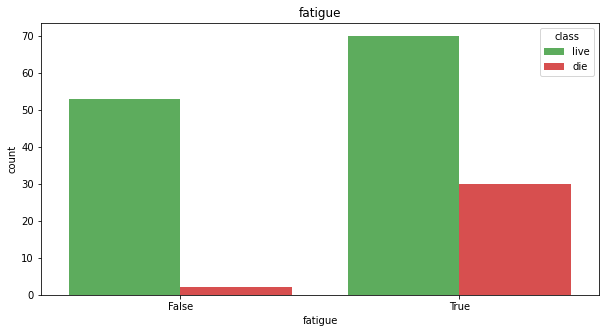

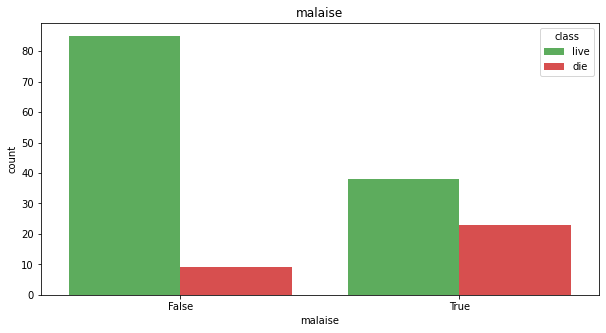

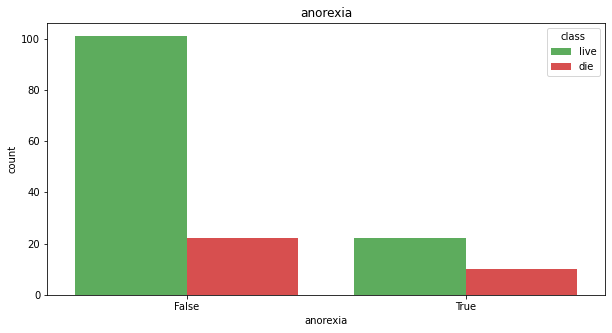

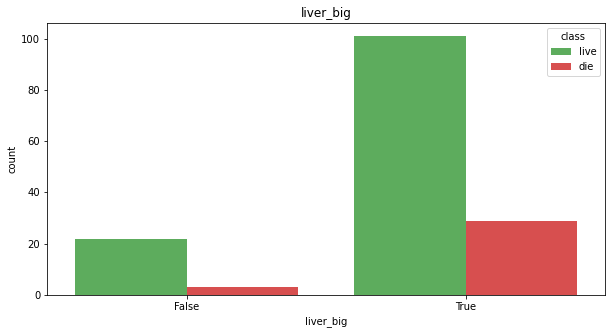

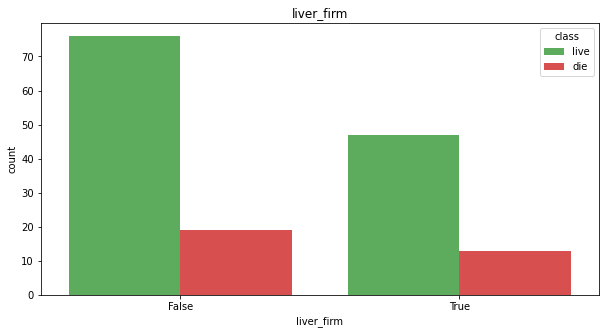

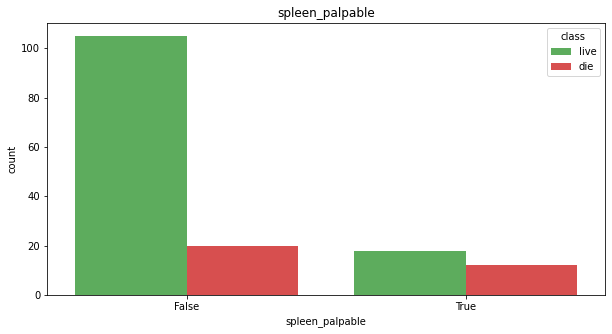

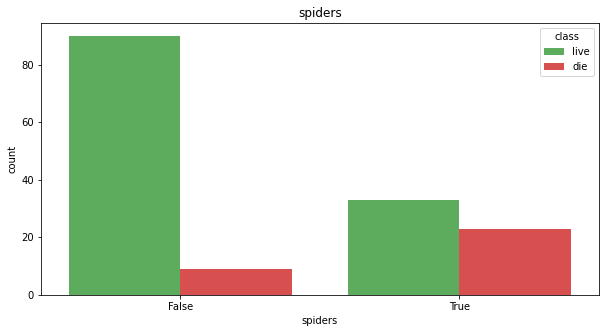

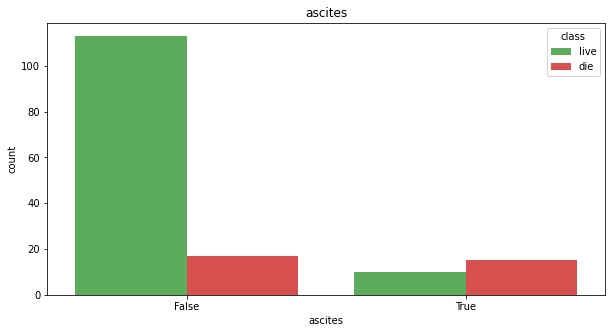

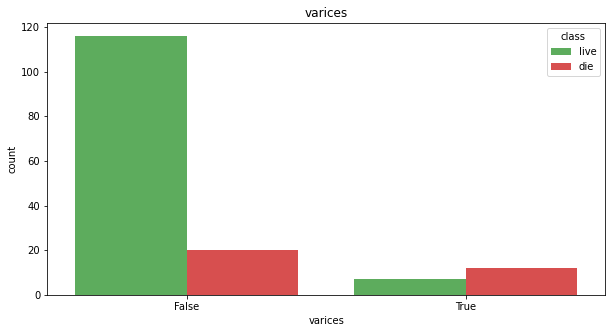

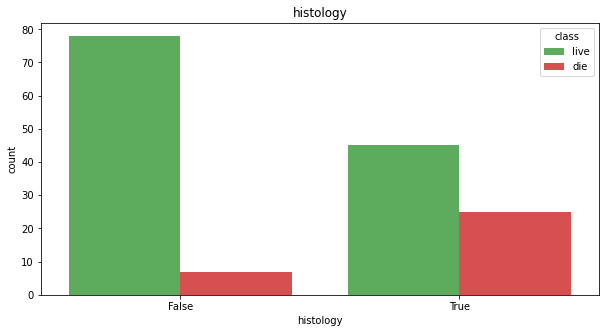

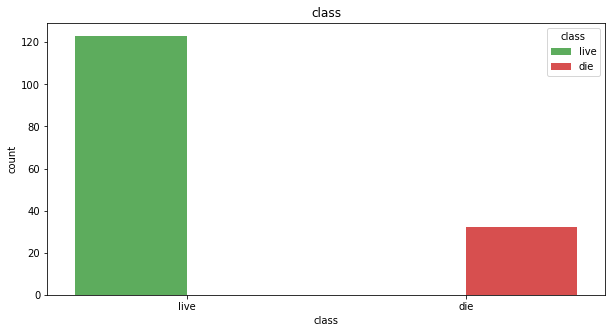

In [408]:
for i in categorical_data.columns[3:]:
    plt.figure(figsize=(10,5))
    plt.title(i)
    sns.countplot(categorical_data[i],hue=categorical_data["class"],palette= ["#50b950","#ee3838"])

In [437]:
categorical_data.columns

Index(['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'histology', 'class'],
      dtype='object')

### GroupBy with all combination 

In [439]:
pd.DataFrame(data.groupby(['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
                           'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
                           'varices',
                           'histology','class']).size())

0
sex    steroid antivirals fatigue malaise anorexia liver_big liver_firm spleen_palpable spiders ascites varices histology class    
female False   False      False   False   False    False     True       True            False   False   False   False     live    1
                                                   True      False      False           False   False   False   False     live    4
                                                                                                                True      live    3
                                                                                        True    True    False   False     live    1
                                                                        True            False   False   False   False     live    1
                                                             True       False           False   False   False   True      die     1
                                                                                        True    False   False   False     live    1
                          True    False   False    False     False      False           False   False   False   False     live    1
                                                             True       False           False   False   False   False     live    1
                                                                                        True    False   False   False     live    1
                                                                        True            True    False   False   True      live    1
                                                   True      False      False           False   False   False   False     live    1
                                                                                                                True      live    3
                                                                                        True    False   False   True      live    1
                                                                        True            True    True    False   True      die     1
                                                             True       False           False   False   False   False     live    1
                                                                                                                True      live    1
                                                                        True            False   False   False   False     live    1
                                          True     True      False      True            True    False   False   False     die     1
                                  True    False    False     True       False           True    False   False   False     die     1
                                                                                                                True      live    2
                                                   True      False      False           False   False   False   False     die     1
                                                                                                                          live    2
                                                                                                True    False   True      die     1
                                                                                                                          live    1
                                                                                        True    False   False   True      die     1
                                                                                                True    False   True      die     1
                                                                        True            False   False   True    True      die     1
                                                                                                True    False   True      die     1
                                      

we can get some insights from the above groupby data.

### Distribution Plot 

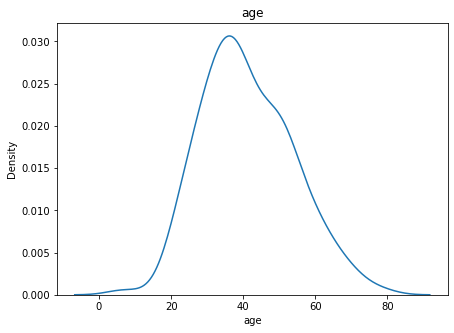

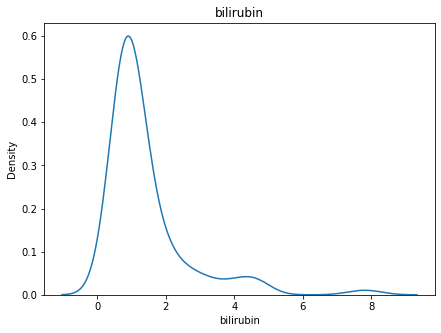

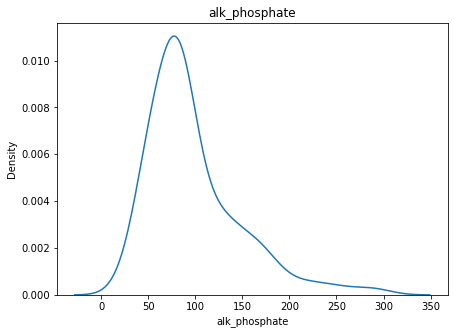

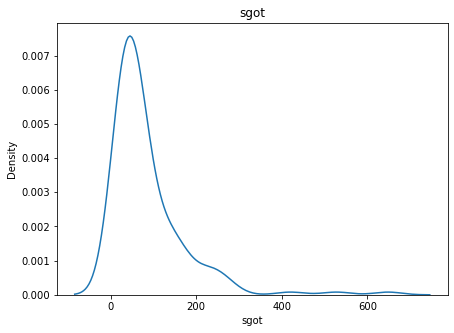

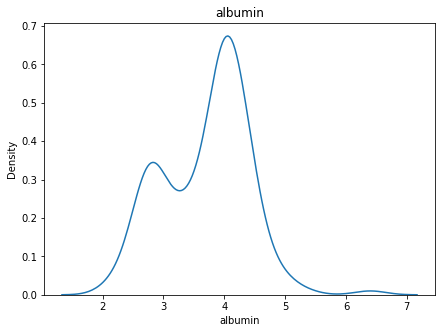

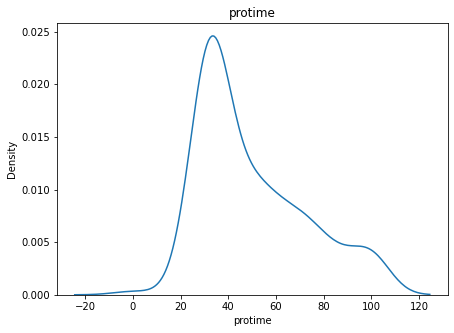

In [413]:
for i in numerical_data:
    plt.figure(figsize=(7,5))
    plt.title(i)
    sns.kdeplot(numerical_data[i])

Most of the numerical(continuous)data are positively skewed, not normally distributed

### Pair Plot

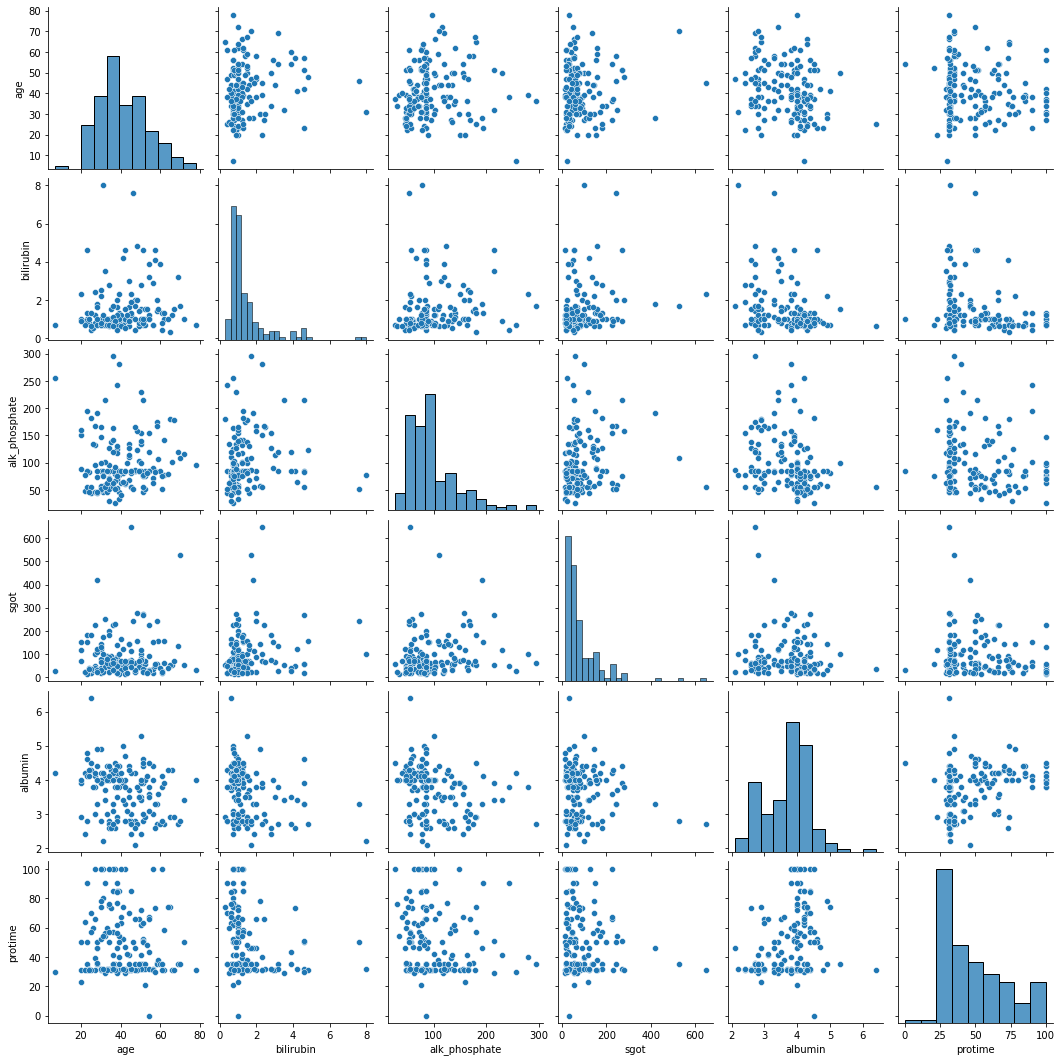

In [414]:
sns.pairplot(numerical_data)

### Correlation

In [440]:
corr=numerical_data.corr()
corr

,age,bilirubin,alk_phosphate,sgot,albumin,protime
age,1.000000,0.130214,0.028570,0.061695,-0.251387,-0.123260
bilirubin,0.130214,1.000000,0.119867,0.227172,-0.315164,-0.207223
alk_phosphate,0.028570,0.119867,1.000000,0.158074,-0.246761,-0.095172
sgot,0.061695,0.227172,0.158074,1.000000,-0.141788,-0.095864
albumin,-0.251387,-0.315164,-0.246761,-0.141788,1.000000,0.325927
protime,-0.123260,-0.207223,-0.095172,-0.095864,0.325927,1.000000


Text(0.5, 1.0, 'Correlation Plot')

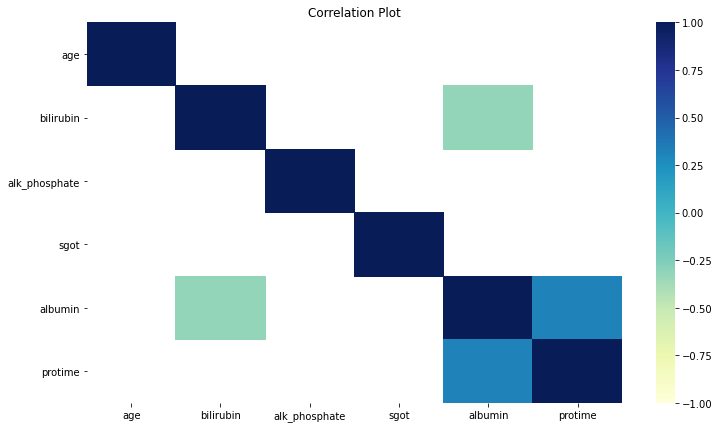

In [442]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)],cmap='YlGnBu', vmax=1.0, vmin=-1.0)
plt.title('Correlation Plot')

From the above insights, there is no much correlation among the data.

Albumin and Billurubin have some correlation among them.

They are not influencing other variables

### Outlier 

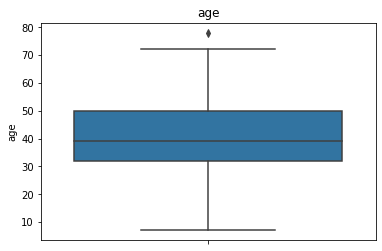

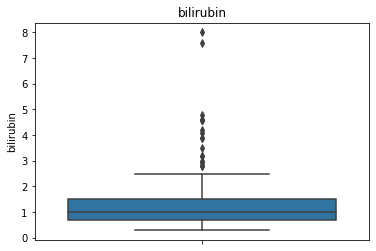

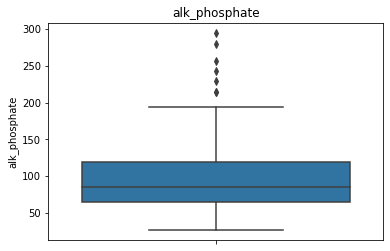

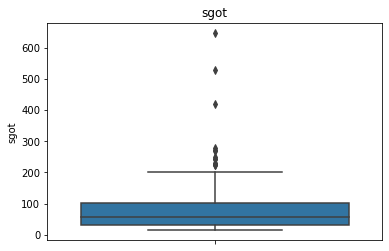

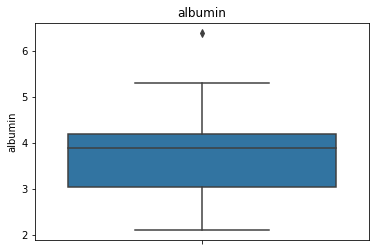

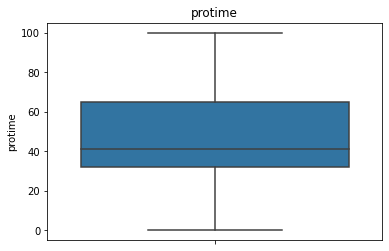

In [417]:
for i in numerical_data:    
    sns.boxplot(y=numerical_data[i])
    plt.title(i)
    plt.show()

In [429]:
def outlier(x):
    a=[]
    empty=[]
    ind=[]
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    inner_fence=q1-(1.5*iqr)
    outer_fence=q3+(1.5*iqr)
    for index,i in enumerate(x):
        if (i<inner_fence or i>outer_fence):
            a.append(i)
            ind.append(index)
            
    if a==empty:
        print(" There is no Outlier")
    else:
        print(" The number of Outliers : ",len(a))

In [430]:
for i in numerical_data:
    print("\n",i)
    outlier(numerical_data[i])


 age
 The number of Outliers :  1

 bilirubin
 The number of Outliers :  18

 alk_phosphate
 The number of Outliers :  7

 sgot
 The number of Outliers :  13

 albumin
 The number of Outliers :  1

 protime
 There is no Outlier


 * Bilirubin (18)

 * Alk_phosphate (7)

 * Sgot (13)
 
These variable are having extreme values in the data